# Kaggle Dataset

Getting Information out of the Kaggle Dataset


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

In [20]:
df = pd.read_csv("../Data/Kaggle_Dataset.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

In [22]:
df.columns

Index(['Unnamed: 0', 'Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP',
       'Resp', 'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2',
       'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

| Spalte          | Beschreibung                                                                                       | Basierend auf Blutprobe? | Invasiv? |
|-----------------|----------------------------------------------------------------------------------------------------|--------------------------|----------|
| Hour            | Stunde der Messung                                                                                 | Nein                     | Nein     |
| HR              | Herzfrequenz (in Schlägen pro Minute)                                                              | Nein                     | Nein     |
| O2Sat           | Sauerstoffsättigung (in %)                                                                         | Nein                     | Nein     |
| Temp            | Körpertemperatur (in °C)                                                                           | Nein                     | Nein     |
| SBP             | Systolischer Blutdruck (in mmHg)                                                                   | Nein                     | Ja       |
| MAP             | Mittlerer arterieller Druck (in mmHg)                                                              | Nein                     | Ja       |
| DBP             | Diastolischer Blutdruck (in mmHg)                                                                  | Nein                     | Ja       |
| Resp            | Atemfrequenz (in Atemzügen pro Minute)                                                             | Nein                     | Nein     |
| EtCO2           | Endtidales CO2 (in mmHg)                                                                           | Nein                     | Ja       |
| BaseExcess      | Basenüberschuss im Blut (in mEq/L)                                                                 | Ja                       | Ja       |
| HCO3            | Bicarbonat (in mEq/L)                                                                              | Ja                       | Ja       |
| FiO2            | Fraktion des eingeatmeten Sauerstoffs (in %)                                                       | Nein                     | Nein     |
| pH              | pH-Wert des Blutes                                                                                 | Ja                       | Ja       |
| PaCO2           | Partialdruck von CO2 im arteriellen Blut (in mmHg)                                                 | Ja                       | Ja       |
| SaO2            | Arterielle Sauerstoffsättigung (in %)                                                              | Ja                       | Ja       |
| AST             | Aspartat-Aminotransferase (ein Leberenzym) (in U/L)                                                 | Ja                       | Ja       |
| BUN             | Blood Urea Nitrogen (Harnstoff-Nitrogen im Blut) (in mg/dL)                                         | Ja                       | Ja       |
| Alkalinephos    | Alkalische Phosphatase (ein Leberenzym) (in U/L)                                                   | Ja                       | Ja       |
| Calcium         | Calciumspiegel im Blut (in mg/dL)                                                                  | Ja                       | Ja       |
| Chloride        | Chloridspiegel im Blut (in mEq/L)                                                                  | Ja                       | Ja       |
| Creatinine      | Kreatininspiegel im Blut (in mg/dL)                                                                | Ja                       | Ja       |
| Bilirubin_direct| Direktes Bilirubin im Blut (in mg/dL)                                                              | Ja                       | Ja       |
| Glucose         | Blutzuckerspiegel (in mg/dL)                                                                       | Ja                       | Ja       |
| Lactate         | Laktatspiegel im Blut (in mmol/L)                                                                  | Ja                       | Ja       |
| Magnesium       | Magnesiumspiegel im Blut (in mg/dL)                                                                | Ja                       | Ja       |
| Phosphate       | Phosphatspiegel im Blut (in mg/dL)                                                                 | Ja                       | Ja       |
| Potassium       | Kaliumspiegel im Blut (in mEq/L)                                                                   | Ja                       | Ja       |
| Bilirubin_total | Gesamtbilirubin im Blut (in mg/dL)                                                                 | Ja                       | Ja       |
| TroponinI       | Troponin I (ein Herzmarker) (in ng/mL)                                                             | Ja                       | Ja       |
| Hct             | Hämatokrit (Volumenprozentsatz der roten Blutkörperchen im Blut)                                   | Ja                       | Ja       |
| Hgb             | Hämoglobin (ein Protein in roten Blutkörperchen) (in g/dL)                                          | Ja                       | Ja       |
| PTT             | Partial Thromboplastin Time (ein Blutgerinnungstest) (in Sekunden)                                 | Ja                       | Ja       |
| WBC             | Weiße Blutkörperchenzahl (in Zellen/µL)                                                            | Ja                       | Ja       |
| Fibrinogen      | Fibrinogen (ein Protein, das bei der Blutgerinnung eine Rolle spielt) (in mg/dL)                   | Ja                       | Ja       |
| Platelets       | Thrombozytenzahl (in Zellen/µL)                                                                    | Ja                       | Ja       |
| Age             | Alter des Patienten (in Jahren)                                                                    | Nein                     | Nein     |
| Gender          | Geschlecht des Patienten (0 für weiblich, 1 für männlich)                                          | Nein                     | Nein     |
| Unit1           | Unbekannte Einheit/Abteilung                                                                       | Nein                     | Nein     |
| Unit2           | Unbekannte Einheit/Abteilung                                                                       | Nein                     | Nein     |
| HospAdmTime     | Zeitpunkt der Krankenhausaufnahme (in Stunden seit der ICU-Aufnahme)                               | Nein                     | Nein     |
| ICULOS          | ICU Length of Stay (Dauer des ICU-Aufenthalts in Stunden)                                          | Nein                     | Nein     |
| SepsisLabel     | Kennzeichnung für Sepsis (0 für keine Sepsis, 1 für Sepsis)                                        | Nein                     | Nein     |
| Patient_ID      | Eindeutige Identifikationsnummer des Patienten                                                      | Nein                     | Nein     |


In [23]:
list_non_invasive = ["HR",
                    "O2Sat",
                    "Temp",
                    "FiO2",
                    "Age",
                    "Gender",
                    "Resp"
]

In [24]:
uebliche_messungen_neonatals = ["SBP", "MAP", "DBP", "EtCO2"]

list_invasive = list_non_invasive + uebliche_messungen_neonatals

In [25]:
df_interesting = df[list_invasive + ["SepsisLabel", "Patient_ID"]]

In [26]:
df_interesting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   HR           1398811 non-null  float64
 1   O2Sat        1349474 non-null  float64
 2   Temp         525226 non-null   float64
 3   FiO2         129365 non-null   float64
 4   Age          1552210 non-null  float64
 5   Gender       1552210 non-null  int64  
 6   Resp         1313875 non-null  float64
 7   SBP          1325945 non-null  float64
 8   MAP          1358940 non-null  float64
 9   DBP          1065656 non-null  float64
 10  EtCO2        57636 non-null    float64
 11  SepsisLabel  1552210 non-null  int64  
 12  Patient_ID   1552210 non-null  int64  
dtypes: float64(10), int64(3)
memory usage: 154.0 MB


In [27]:
df_interesting.dropna(how="all", inplace=True)

C:\Users\deag\AppData\Local\Temp\ipykernel_14480\653024312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interesting.dropna(how="all", inplace=True)


In [28]:
df_interesting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   HR           1398811 non-null  float64
 1   O2Sat        1349474 non-null  float64
 2   Temp         525226 non-null   float64
 3   FiO2         129365 non-null   float64
 4   Age          1552210 non-null  float64
 5   Gender       1552210 non-null  int64  
 6   Resp         1313875 non-null  float64
 7   SBP          1325945 non-null  float64
 8   MAP          1358940 non-null  float64
 9   DBP          1065656 non-null  float64
 10  EtCO2        57636 non-null    float64
 11  SepsisLabel  1552210 non-null  int64  
 12  Patient_ID   1552210 non-null  int64  
dtypes: float64(10), int64(3)
memory usage: 154.0 MB


In [29]:
df_interesting["Patient_ID"].value_counts()

3658      336
114471    336
101922    336
117406    336
4905      336
         ... 
110085      8
16854       8
118844      8
16161       8
109559      8
Name: Patient_ID, Length: 40336, dtype: int64

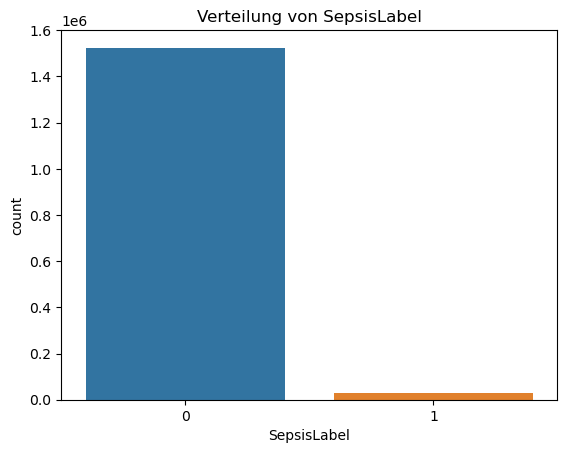

In [30]:
sns.countplot(x='SepsisLabel', data=df_interesting)
plt.title('Verteilung von SepsisLabel')
plt.show()

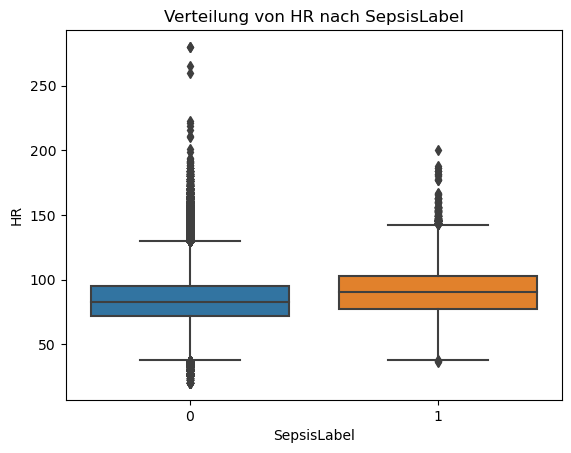

In [31]:
sns.boxplot(x='SepsisLabel', y='HR', data=df)
plt.title('Verteilung von HR nach SepsisLabel')
plt.show()


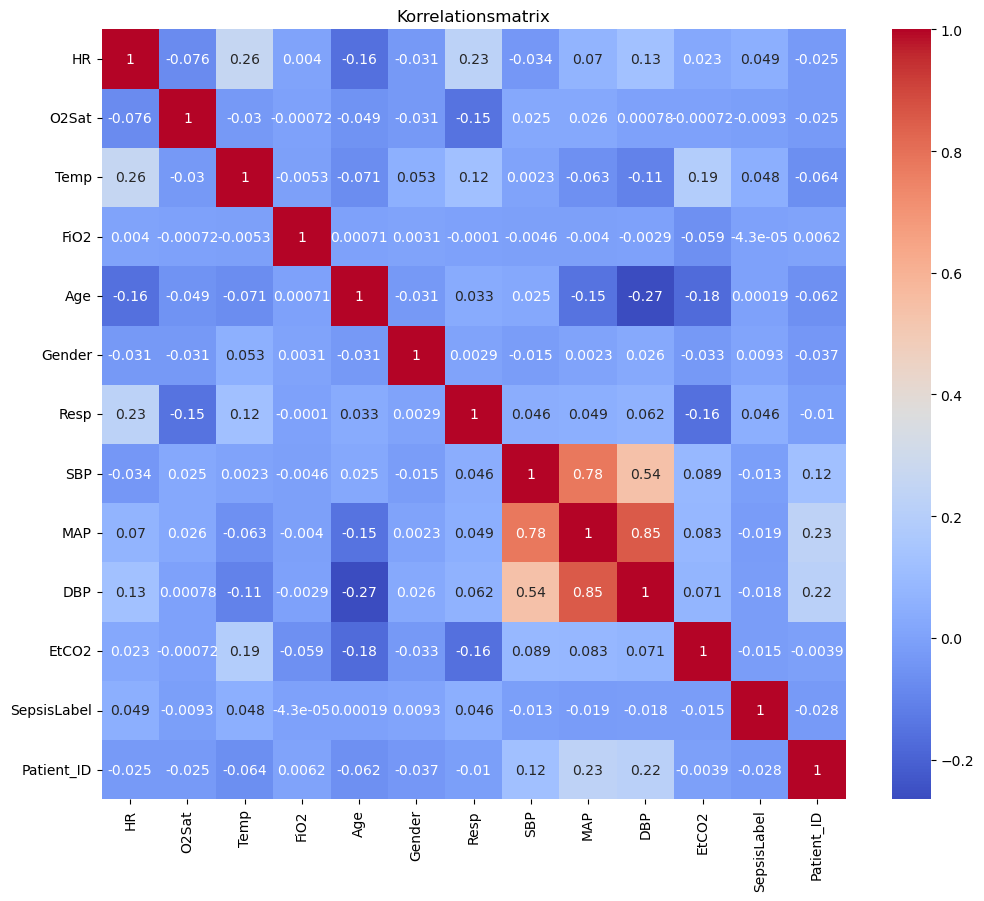

In [32]:
correlation_matrix = df_interesting.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix')
plt.show()


In [33]:
df_interesting["SepsisLabel"].unique()

array([0, 1], dtype=int64)

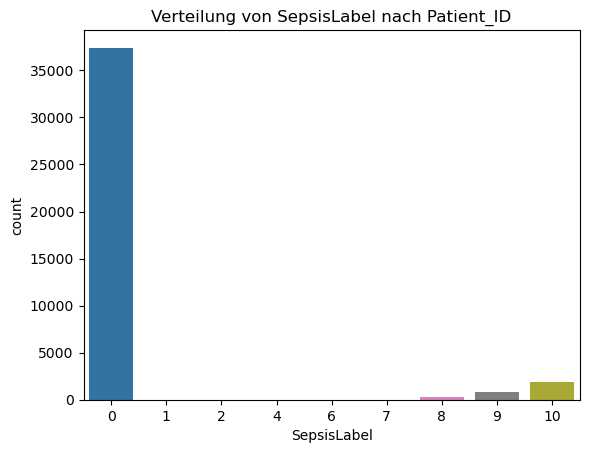

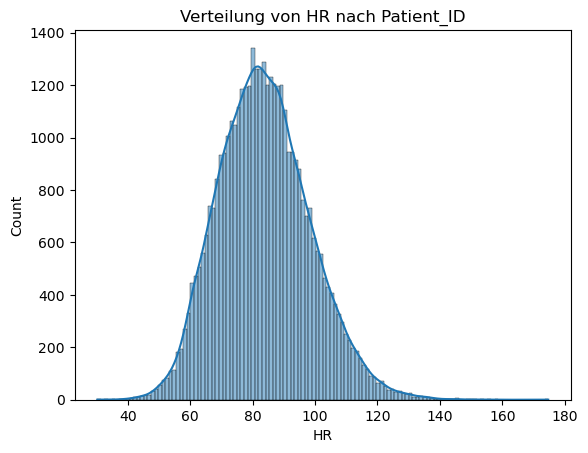

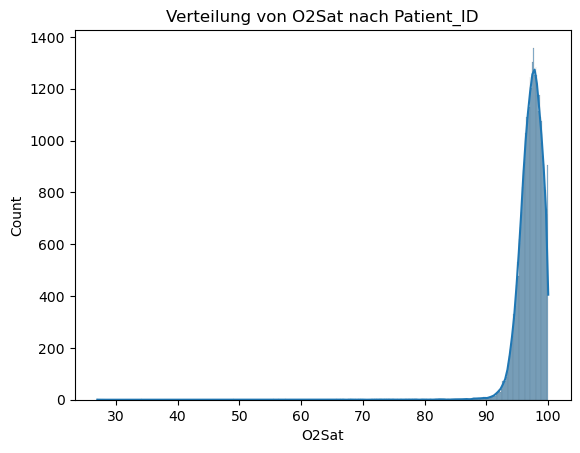

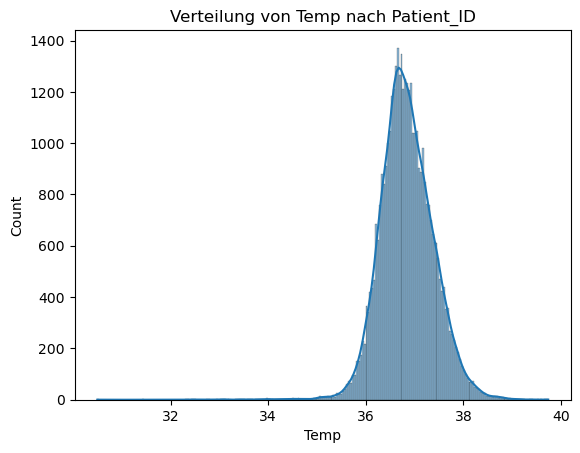

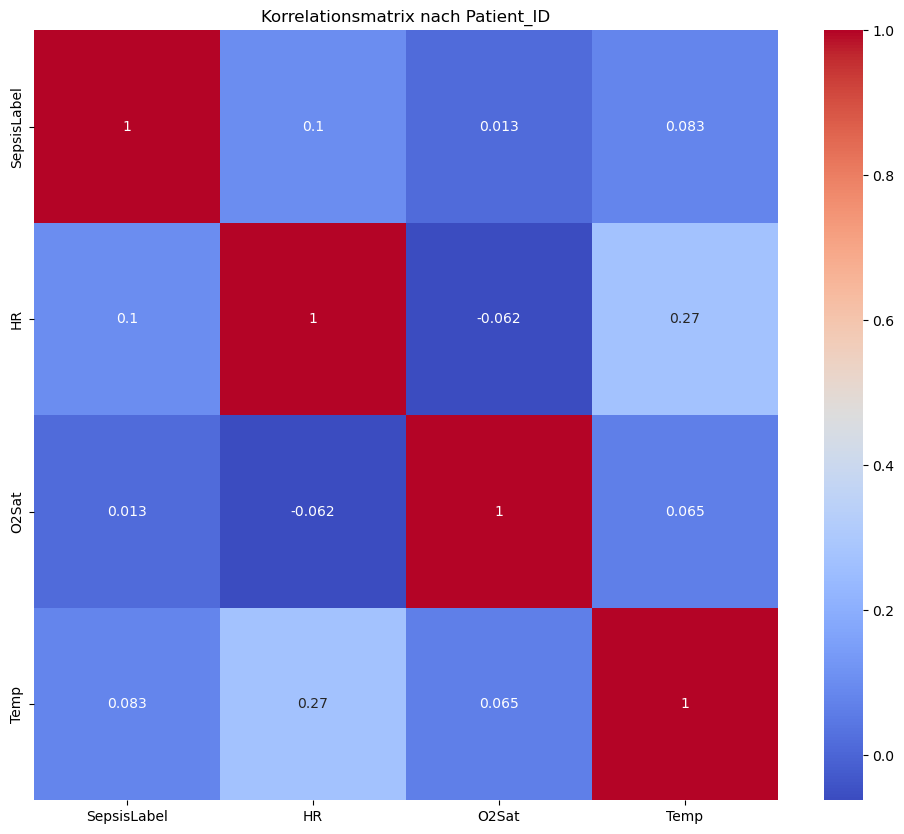

In [34]:
# Gruppieren der Daten nach Patient_ID
grouped = df.groupby('Patient_ID').agg({
    'SepsisLabel': 'sum',
    'HR': 'mean',
    'O2Sat': 'mean',
    'Temp': 'mean',
    # Fügen Sie hier weitere Aggregationsfunktionen für andere Merkmale hinzu
})

# Verteilung von SepsisLabel in den gruppierten Daten
sns.countplot(x='SepsisLabel', data=grouped)
plt.title('Verteilung von SepsisLabel nach Patient_ID')
plt.show()

# Verteilung von HR in den gruppierten Daten
sns.histplot(grouped['HR'], kde=True)
plt.title('Verteilung von HR nach Patient_ID')
plt.show()

# Verteilung von O2Sat in den gruppierten Daten
sns.histplot(grouped['O2Sat'], kde=True)
plt.title('Verteilung von O2Sat nach Patient_ID')
plt.show()

# Verteilung von Temp in den gruppierten Daten
sns.histplot(grouped['Temp'], kde=True)
plt.title('Verteilung von Temp nach Patient_ID')
plt.show()

# Korrelationsmatrix für die gruppierten Daten
correlation_matrix = grouped.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix nach Patient_ID')
plt.show()


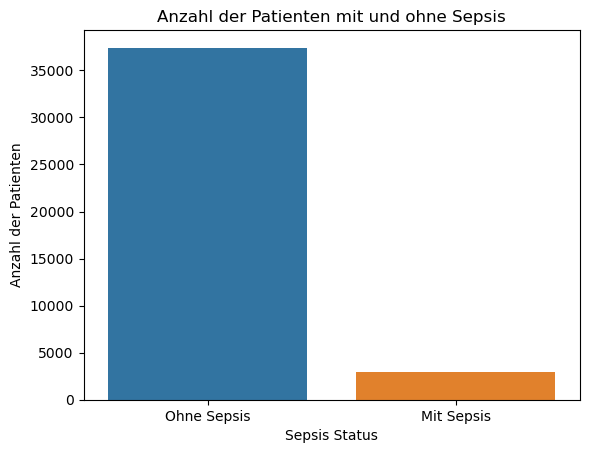

In [35]:
# Gruppieren der Daten nach Patient_ID und Summieren der SepsisLabel-Werte
# Wenn ein Patient mindestens einen Eintrag mit SepsisLabel=1 hat, wird er als Patient mit Sepsis betrachtet
grouped_sepsis = df.groupby('Patient_ID')['SepsisLabel'].sum()

# Erstellen eines neuen DataFrames, in dem Patienten mit Sepsis den Wert 1 haben und Patienten ohne Sepsis den Wert 0
sepsis_df = pd.DataFrame({
    'Patient_ID': grouped_sepsis.index,
    'Has_Sepsis': (grouped_sepsis > 0).astype(int)
})

# Erstellen eines Balkendiagramms
sns.countplot(x='Has_Sepsis', data=sepsis_df)
plt.title('Anzahl der Patienten mit und ohne Sepsis')
plt.xlabel('Sepsis Status')
plt.ylabel('Anzahl der Patienten')
plt.xticks([0, 1], ['Ohne Sepsis', 'Mit Sepsis'])
plt.show()


In [38]:

# Schritt 2: Daten vorbereiten
# Angenommen, df ist Ihr DataFrame
X = df_interesting.drop(columns=['SepsisLabel', 'Patient_ID'])  # Merkmale
y = df_interesting['SepsisLabel']  # Zielvariable

# Teilen Sie die Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Schritt 3: Unaufgeglichene Daten behandeln
# Berechnen Sie die Klassen-Gewichtungen
weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)


# Schritt 4: Modell trainieren
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train.fillna(-1), y_train, sample_weight=weights)

# Schritt 5: Vorhersagen und Auswertung
y_pred = clf.predict(X_test.fillna(-1))
y_prob = clf.predict_proba(X_test.fillna(-1))[:, 1]

print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

print("Konfusionsmatrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC-Score:")
print(roc_auc_score(y_test, y_prob))

# Schritt 6: Merkmalswichtigkeiten
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print("Merkmalswichtigkeiten:")
print(feature_importances)


Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    457319
           1       0.06      0.04      0.04      8344

    accuracy                           0.97    465663
   macro avg       0.52      0.51      0.52    465663
weighted avg       0.97      0.97      0.97    465663

Konfusionsmatrix:
[[452473   4846]
 [  8041    303]]
ROC-AUC-Score:
0.7316124417618222
Merkmalswichtigkeiten:
        importance
Age       0.205350
HR        0.138994
SBP       0.123146
MAP       0.118263
Resp      0.103653
DBP       0.094956
O2Sat     0.073894
Temp      0.068189
FiO2      0.028146
EtCO2     0.028110
Gender    0.017300


In [41]:
print(y.value_counts())

0    1524294
1      27916
Name: SepsisLabel, dtype: int64


In [39]:
# Aus der Konfusionsmatrix extrahieren
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("Wahr Positiv (TP):", tp)
print("Wahr Negativ (TN):", tn)
print("Falsch Positiv (FP):", fp)
print("Falsch Negativ (FN):", fn)


Wahr Positiv (TP): 303
Wahr Negativ (TN): 452473
Falsch Positiv (FP): 4846
Falsch Negativ (FN): 8041


In [ ]:
# Anwendung von SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [46]:

# Schritt 2: Daten vorbereiten
# Angenommen, df ist Ihr DataFrame
X = df_interesting.drop(columns=['SepsisLabel', 'Patient_ID'])  # Merkmale
y = df_interesting['SepsisLabel']  # Zielvariable

# Teilen Sie die Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Schritt 3: Unaufgeglichene Daten behandeln
# Berechnen Sie die Klassen-Gewichtungen
# weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
imputer = KNNImputer(n_neighbors=5)
X_train_filled = imputer.fit_transform(X_train)

# Anwendung von SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_filled, y_train)

# Schritt 4: Modell trainieren
clf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
clf_smote.fit(X_train_resampled.fillna(-1), y_train_resampled)

# Schritt 5: Vorhersagen und Auswertung
y_pred = clf.predict(X_test.fillna(-1))
y_prob = clf.predict_proba(X_test.fillna(-1))[:, 1]

print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

print("Konfusionsmatrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC-Score:")
print(roc_auc_score(y_test, y_prob))

# Schritt 6: Merkmalswichtigkeiten
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print("Merkmalswichtigkeiten:")
print(feature_importances)


KeyboardInterrupt: 

HistGradientClassifier

In [ ]:
# Trainieren des Modells
clf_hist = HistGradientBoostingClassifier(random_state=42, verbose=1)
clf_hist.fit(X_train_resampled, y_train_resampled)


# Schritt 5: Vorhersagen und Auswertung
y_pred = clf.predict(X_test.)
y_prob = clf.predict_proba(X_test)[:, 1]

print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

print("Konfusionsmatrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC-Score:")
print(roc_auc_score(y_test, y_prob))

# Schritt 6: Merkmalswichtigkeiten
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print("Merkmalswichtigkeiten:")
print(feature_importances)
